In [6]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [2]:
from langchain.chat_models import init_chat_model

In [4]:
model_id="gemini-2.5-flash-preview-05-20"
llm = init_chat_model(model=model_id,  model_provider="google_vertexai")

In [8]:
def call_model(state: MessagesState) -> MessagesState:
    state['messages'] = llm.invoke(state['messages'])
    return state

In [9]:
graph_builder = StateGraph(MessagesState)
graph_builder.add_node("llm", call_model)
graph_builder.add_edge(START, "llm")
graph_builder.add_edge("llm", END)
graph = graph_builder.compile()

In [11]:
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image, display

def draw_graph(graph: CompiledStateGraph):
    display(Image(graph.get_graph().draw_mermaid_png()))

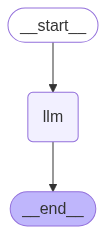

In [12]:
draw_graph(graph)

In [13]:
from langchain_core.messages import SystemMessage, HumanMessage
messages = [
    SystemMessage("You are an helpful assistant"),
    HumanMessage("I would like to know about democracy")

]
result = graph.invoke({"messages": messages})

In [15]:
result['messages']

[SystemMessage(content='You are an helpful assistant', additional_kwargs={}, response_metadata={}, id='2de46728-754c-4943-b1af-174e67e7fae9'),
 HumanMessage(content='I would like to know about democracy', additional_kwargs={}, response_metadata={}, id='9674ef01-fa68-4a3a-8c18-e17abc834232'),
 AIMessage(content='Democracy is a fascinating and complex concept, often hailed as one of the most effective and just forms of governance. Let\'s break it down:\n\n---\n\n### What is Democracy?\n\nAt its most fundamental level, democracy is a system of government where **power is vested in the people**, who rule either directly or through elected representatives. The word itself comes from ancient Greek:\n*   **"Demos"** meaning "people"\n*   **"Kratos"** meaning "power" or "rule"\n\nSo, literally, it means "rule by the people."\n\n---\n\n### Core Principles and Characteristics\n\nWhile there\'s no single perfect model, most democratic systems share several key principles:\n\n1.  **Popular Soverei

In [16]:
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an helpful assistant
================================ Human Message =================================

I would like to know about democracy
================================== Ai Message ==================================

Democracy is a fascinating and complex concept, often hailed as one of the most effective and just forms of governance. Let's break it down:

---

### What is Democracy?

At its most fundamental level, democracy is a system of government where **power is vested in the people**, who rule either directly or through elected representatives. The word itself comes from ancient Greek:
*   **"Demos"** meaning "people"
*   **"Kratos"** meaning "power" or "rule"

So, literally, it means "rule by the people."

---

### Core Principles and Characteristics

While there's no single perfect model, most democratic systems share several key principles:

1.  **Popular Sovereignty:** The ultimate 